<a href="https://colab.research.google.com/github/rahulchandra2004/energy-consumption-prediction/blob/main/Rahul_Energy_Consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
data=pd.read_csv("energydata_complete.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
X=data[['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]

In [9]:
y=data['Appliances']

In [10]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
model=Sequential([Dense(128, activation='relu', input_shape=(X_train.shape[1],)),Dense(64, activation='relu'),Dense(32, activation='relu'),Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
history=model.fit(
    X_train, y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1
)

Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14894.3164 - mae: 72.4480 - val_loss: 9393.8193 - val_mae: 52.7507
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9656.4238 - mae: 54.9596 - val_loss: 8991.8135 - val_mae: 56.5599
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9044.9336 - mae: 53.3044 - val_loss: 8751.4941 - val_mae: 52.2682
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8949.4434 - mae: 52.5181 - val_loss: 8634.0547 - val_mae: 54.7016
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9179.6357 - mae: 53.3862 - val_loss: 8503.0176 - val_mae: 47.5661
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8986.9639 - mae: 53.1547 - val_loss: 8393.9268 - val_mae: 46.9334
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8322.3828 - mae: 50.6849 - val_loss: 8276.9502 - val_mae: 50.1604
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8678.8418 - mae: 51.0262 - val_loss: 8150.7520 - val_mae:

In [15]:
y_pred=model.predict(X_test)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 6638.65234375
R² Score: 0.33660513162612915


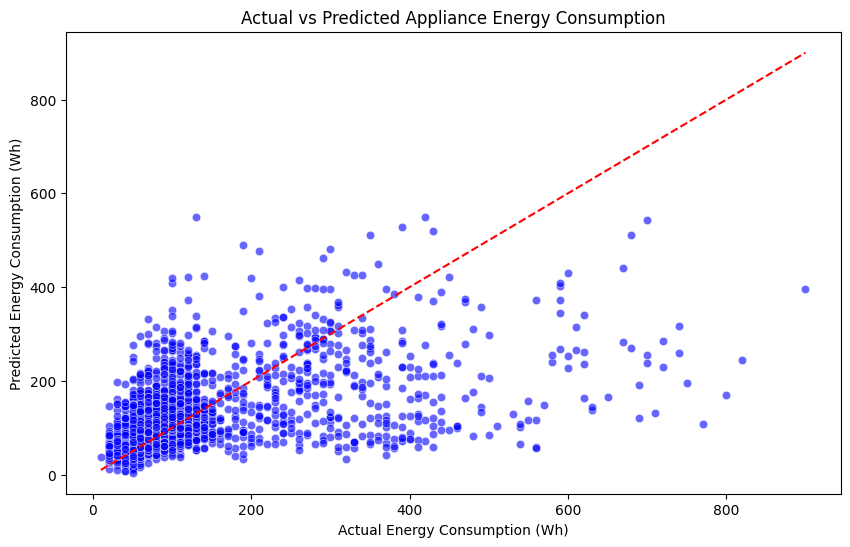

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6, color="blue")
plt.xlabel("Actual Energy Consumption (Wh)")
plt.ylabel("Predicted Energy Consumption (Wh)")
plt.title("Actual vs Predicted Appliance Energy Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

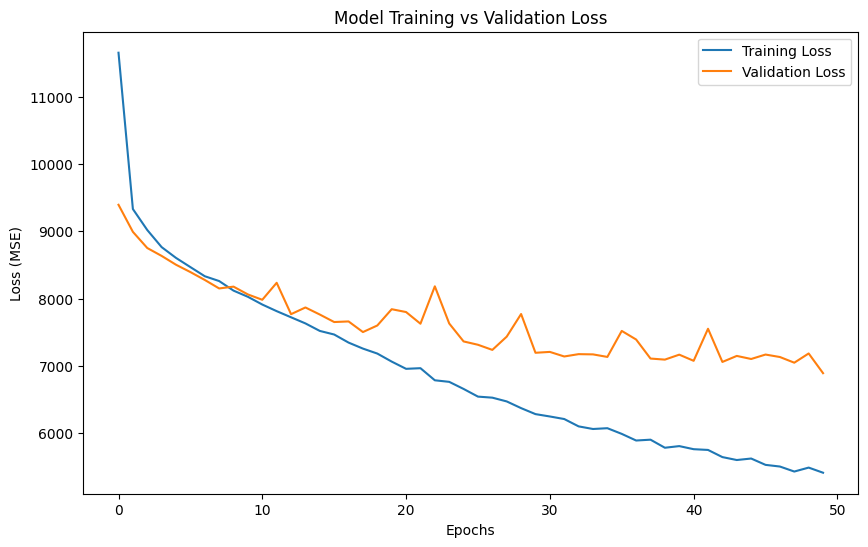

In [18]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Model Training vs Validation Loss")
plt.legend()
plt.show()

In [19]:
sample=pd.DataFrame([[20, 40, 19, 41, 21, 42, 22, 43, 23, 44, 24, 45,25, 46, 26, 47, 27, 48, 15, 760, 50, 3, 40, 10]],columns=X.columns)
sample_scaled = scaler.transform(sample)
predicted_value = model.predict(sample_scaled)[0][0]
report = pd.DataFrame({"Temperature (°C)": [20],"Humidity (%)":[40],"Wind Speed (km/h)":[3],"Visibility (km)":[40],"Pressure (mmHg)":[760],"Predicted Energy Consumption (Wh)": [round(predicted_value, 2)]
})
print(r"\Energy Consumption Prediction Report\n")
print(report.to_string(index=False))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
\Energy Consumption Prediction Report\n
 Temperature (°C)  Humidity (%)  Wind Speed (km/h)  Visibility (km)  Pressure (mmHg)  Predicted Energy Consumption (Wh)
               20            40                  3               40              760                          96.110001
